# <span style="color:red">  Esercitazione_02</span>

In [1]:
#Librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Informazioni utili:

- Le cartelle *<font color="blue">02.1, 02.2</font>* contengono tutti i codici scritti per la realizzazione dell'esercitazione.
- Nella cartella *<font color="blue">Results</font>* sono già contenuti tutti i risultati di output suddivisi nelle singole cartelle per ognuno degli esercizi. Questi ultimi sono quelli analizzati ed esposti in questo notebook e non è quindi necessaria la ricompilazione e la riesecuzione dei codici; nel caso si volessero rieffettuare le simulazioni è sufficiente digitare *"<font color="green">make run</font>"* da terminale. I codici sono strutturati in modo tale che una nuova compilazione vada automaticamente a sostituire i vecchi dati di output con quelli nuovi appena ottenuti.

## Esercizio 02.1

Il calcolo del seguente integrale $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ è stato effettuato con due tecniche di integrazione diverse:
1. Campionando una distribuzione uniforme nell'intervallo di integrazione;
2. Importance sampling.

Nel primo caso è stato utilizzato il metodo della media il quale prevede che una stima dell'integrale da calcolare può essere ottenuta attraverso:

$$I = \int_a^b f(x) dx = (b -a)\langle f \rangle_{[a,b]} \simeq (b-a)\frac{1}{N} \sum_{i=1}^N f(x_i) \,$$

dove $x_{i}$ sono variabili casuali uniformemente distribuite nell'intervallo di integrazione $[a,b]$.

Attraverso l'uso di una classe virtuale (*<font color="grey"> funcvirtual.h, funcvirtual.cpp</font>*) che mi permette di valutare la funzione e una classe standard implementata per svolgere il calcolo dell'integrale (*<font color="grey"> Integrate.h, Integrate.cpp</font>*) è stato possibile effettuare un numero elevato di integrali (throws = $10^4$) per stimare $I$ e successivamente applicare la tecnica del *data blocking* per la stima degli errori con numero di blocchi pari a $N_{block} = 100$.
Di seguito è riportato il grafico del valore stimato per l'integrale al variare del numero di prove (throws) con il rispettivo errore.

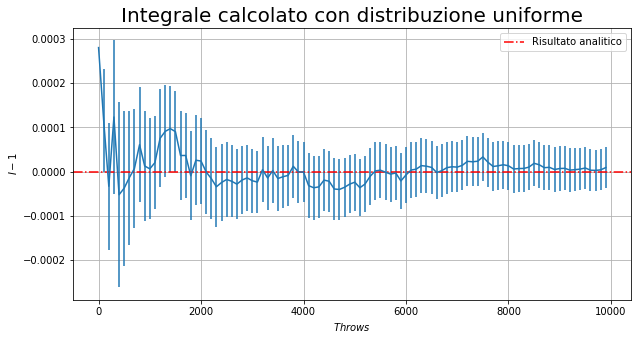

In [9]:
plt.figure(figsize=(10,5))
x, y, error1 = np.loadtxt("Results/02.1/Results02.1.1.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y -1 , yerr=error1)
plt.axhline(y=0, color = 'red',linestyle='-.',label = 'Risultato analitico')
plt.xlabel('$Throws$')
plt.ylabel('$I - 1$')
plt.title('Integrale calcolato con distribuzione uniforme', fontsize = 20)
plt.grid(True)
plt.legend()

plt.show()

Nel secondo caso è stata utilizzata la tecnica dell'importance sasmpling. Quest'ultima prevede di stimare un integrale utilizzando una distribuzione diversa da quella uniforme poichè al posto di considerare l'integrale $$I = \int_a^b g(x) dx = 1$$ si valuta $$I = \int_a^b \frac{g(x)}{p(x)}p(x) dx = 1$$ in cui $\frac{g(x)}{p(x)}$ è la funzione da integrare con il metodo della media e $p(x)$ è la distribuzione di probabilità con cui campionare i numeri casuali. Questa tecnica ha il vantaggio di minimizzare l'errore sulla stima dell'integrale se la distribuzione $p(x)$ scelta è la più possibile simile alla $g(x)$.

Nel caso in analisi sono state prese in considerazione due funzioni che potessero approssimare l'integranda nel range di integrazione. La prima è lo sviluppo di Taylor troncato al primo ordine mentre la seconda è la retta: $$y(x) = \frac{\pi}{2}(1-x) .$$

Entrambe le possibilità sono riportate nel seguente grafico.

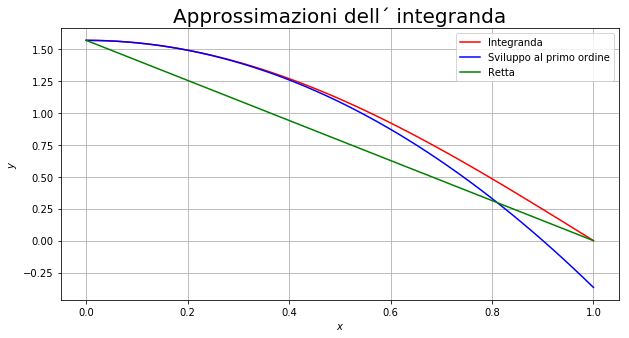

In [10]:
x = np.linspace(0, 1, num=50)
g_x = np.array([math.pi/2 * np.cos(math.pi*t/2) for t in x ])
sviluppo = np.array([math.pi/2 * (1 - (math.pi*t/2)**2/2)  for t in x])
retta = np.array([math.pi/2 * (1 - t) for t in x])

plt.figure(figsize=(10,5))
plt.plot(x, g_x, color="red", label="Integranda")
plt.plot(x, sviluppo, color="blue", label="Sviluppo al primo ordine")
plt.plot(x, retta, color="green", label="Retta")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Approssimazioni dell´ integranda', fontsize = 20)
plt.grid(True)
plt.legend()
plt.show()

Come si può notare dal grafico lo sviluppo di Taylor è stato escluso dalle possibilità poichè nell'intervallo considerato può assumere valori negativi e di conseguenza la retta è stata considerata la candidata migliore.
Si è proceduto normalizzando $y(x)$ in modo da ottenere una nuova distribuzione di probabilità con cui valutare l'integrale:

$$p(x) = 2(1-x)$$ 

Per poter generare numeri casuali secondo questa distribuzione si utilizza il metodo di inversione della distribuzione cumulativa ottenendo in conclusione: 

$$x = 1+\sqrt{1-y} \quad  y \in [0,1). $$

Applicando ora il metodo della media all'integrale:

$$I = \int_0^1 \frac{\pi \cos(\pi x/2)}{4(1-x)} dx $$

dove le $x$ sono campionate dalla $p(x)$ è possibile ottenere una stima dell'integrale.

Il procedimento utilizzato è analogo a quello utilizzato precedentemente. Si riporta di seguito il grafico del valore stimato per $I$ al variare del numero di prove (throws) con il rispettivo errore.

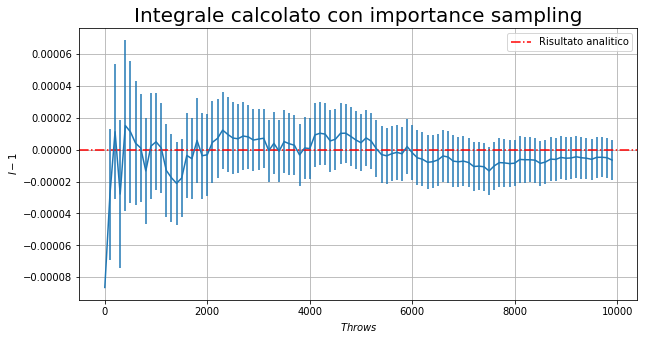

In [11]:
plt.figure(figsize=(10,5))
x, y, error2 = np.loadtxt("Results/02.1/Results02.1.2.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y - 1 , yerr=error2)
plt.axhline(y=0, color = 'red',linestyle='-.',label = 'Risultato analitico')
plt.xlabel('$Throws$')
plt.ylabel('$I - 1$')
plt.title('Integrale calcolato con importance sampling', fontsize = 20)
plt.grid(True)
plt.legend()
plt.show()

In entrambi i risultati si può notare che all'aumentare del numero degli integrali calcolati i risultati delle simulazioni convergono al risultato analitico abbattendo progressivamente gli errori. Questo comportemento è riconducibile al teorema del limite centrale.

Inoltre si può notare che il calcolo dell'integrale con il metodo dell'importance sampling è più preciso rispetto a quello precedente poichè il suo errore è minore di quello calcolato con il metodo della media. Di seguito viene riporato il fattore di guadagno sull'errore.

In [14]:
#è stato preso in considerazione l'errore dell'ultimo blocco in entrambi i casi poichè è il minore tra tutti
print('Errore con il metodo della media:', error1[len(error1)-1])
print('Errore con importance sampling:', error2[len(error2)-1])
print('\n')
print('L’errore è diminuto di un fattore:', error1[len(error1)-1]/error2[len(error2)-1])

Errore con il metodo della media: 4.62719810142e-05
Errore con importance sampling: 1.24934749215e-05


L’errore è diminuto di un fattore: 3.703691831531244


## Esercizio 02.2

Con lo scopo di simulare dei Random Walk (RW) è stata implementata una classe (*<font color="grey"> RW.h, RW.cpp</font>*) che permette:

1. di simulare un RW discreto tridimensionale su un reticolo cubico con passo reticolare fissato; ad ogni step viene estratto un numero casuale che viene assegnato arbitrariamente ad una delle possibili direzioni.
2. di simulare un RW tridimensionale nel continuo; ad ogni step vengono estratti gli angoli $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$ che mi identificano univocamente la direzione dello spostamento nello spazio.

Per entrambi i RW si è ricavata una stima di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ al variare del numero di step $N_{step}$ dove $\vec{r}_N = a\times \sqrt{x_N^2+y_N^2+z_N^2}$ rappresenta la distanza cartesiana dall'origine con $a$ passo reticolare.
I RW simulati possiedono entrambi un passo reticolare costante con $ a = 1$. Considerando il numero di steps $N_{steps}=1,2,3,...,100$ ad ogni valore di esso sono state effettutate $M = 10^4$ simulazioni alle quali è stato applicato il metodo del data blocking con $N_{blocchi}=100$ che mi ha permesso di ottenere la miglior stima  $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$.

Di seguito sono riportati i grafici di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ al variare del numero di steps $N_{steps}$ con i rispettivi errori (non visibili ad occhio) per entrambi i RW simulati.

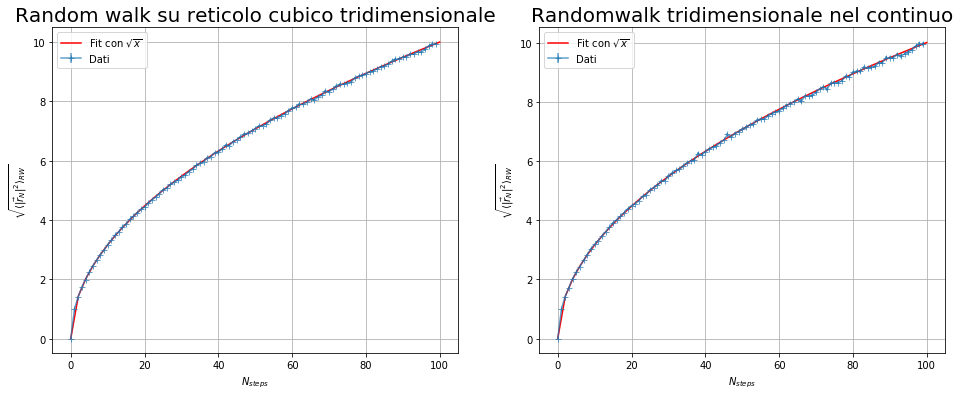

In [15]:
plt.figure(figsize=(16,6))
x = np.linspace(0,100)

plt.subplot(1,2,1)
N, discreto, error = np.loadtxt("Results/02.2/Results02.2.1", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,discreto,yerr=error, alpha=0.7,label='Dati', marker = '+')
plt.plot(x,np.sqrt(x), label='Fit con $\sqrt{x}$', color = 'red')
plt.title("Random walk su reticolo cubico tridimensionale", fontsize = 20)
plt.xlabel(r'$N_{steps}$')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
N, continuo, error = np.loadtxt("Results/02.2/Results02.2.2", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,continuo,yerr=error, alpha=0.7,label='Dati', marker = '+')
plt.plot(x,np.sqrt(x),label='Fit con $\sqrt{x}$', color = 'red')
plt.title("Randomwalk tridimensionale nel continuo", fontsize = 20)
plt.xlabel(r'$N_{steps}$')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.grid(True)
plt.legend()
plt.show()

Per entrambe le simulazioni è stato eseguito un fit con $y(N_{steps}) = \sqrt{N_{steps}}$. Come si evince dai grafici le due curve sono compatibili e questo permette di dedurre che i random walk simulati sono descritti correttamente da un comportamento diffusivo in cui la deviazione standard della posizione è $ \propto \sqrt{N_{steps}}$ come previsto teoricamente.